In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from tqdm import tqdm
import warnings

warnings.filterwarnings(action='ignore')

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
age_gender_info = pd.read_csv('./data/age_gender_info.csv')
submission = pd.read_csv('./data/sample_submission.csv')

In [3]:
train['임대보증금'] = train['임대보증금'].replace('-', 0)
train['임대료'] = train['임대료'].replace('-', 0)
test['임대보증금'] = test['임대보증금'].replace('-', 0)
test['임대료'] = test['임대료'].replace('-', 0)

In [4]:
test['자격유형'] = test['자격유형'].fillna('A')

In [5]:
train = train.fillna(0)
test = test.fillna(0)

In [6]:
train['임대보증금'] = train['임대보증금'].astype('float64')
train['임대료'] = train['임대료'].astype('float64')
test['임대보증금'] = test['임대보증금'].astype('float64')
test['임대료'] = test['임대료'].astype('float64')

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
# 임대건물구분 인코더
le1 = LabelEncoder()
# 지역 인코더
le2 = LabelEncoder()
# 공급유형 인코더
le3 = LabelEncoder()
# 자격유형 인코더
le4 = LabelEncoder()

In [9]:
le1.fit(train['임대건물구분'])
le2.fit(train['지역'])
le3.fit(train['공급유형'])
le4.fit(train['자격유형'].append(pd.Series(['H'])))

LabelEncoder()

In [10]:
train['임대건물구분'] = le1.transform(train['임대건물구분'])
train['지역'] = le2.transform(train['지역'])
train['공급유형'] = le3.transform(train['공급유형'])
train['자격유형'] = le4.transform(train['자격유형'])

In [11]:
test['임대건물구분'] = le1.transform(test['임대건물구분'])
test['지역'] = le2.transform(test['지역'])
test['공급유형'] = le3.transform(test['공급유형'])
test['자격유형'] = le4.transform(test['자격유형'])

In [15]:
new_test = test.groupby(['단지코드']).mean()

In [16]:
new_test = new_test.reset_index()

In [17]:
x_train = train.iloc[:, 1:-1]
y_train = train.iloc[:,-1]
new_test = new_test.iloc[:,1:]

In [18]:
model = RandomForestRegressor(n_jobs=-1, random_state=42)

In [19]:
model.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [20]:
pred = model.predict(new_test)

In [21]:
submission['num'] = pred

In [22]:
submission.to_csv('raw.csv', index=False)

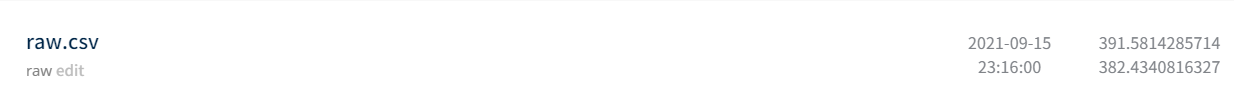